## Map search

In [12]:
%timeit -n 10000 "'-'.join([n for n in range(100)])"

7.54 ns ± 0.0145 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%time [n +1 for n in range(100)]

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 14.1 µs


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [6]:
BEIJING, CHANGCHUN, WULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN WULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [7]:
dictionary = {}

In [8]:
connection = {
    CHANGCHUN: [BEIJING],
    WULUMUQI: [BEIJING], 
    BEIJING: [WULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

In [12]:
%matplotlib inline
import networkx as nx

/Users/tracy/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


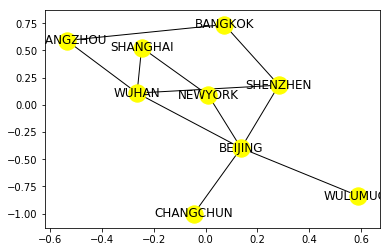

In [13]:
graph = connection
g = nx.Graph(graph)
nx.draw_networkx(g,arrows=True,with_labels=True,node_color='yellow')

In [29]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
                
        pathes = sorted(pathes, key=len) 
                
        seen.add(froniter)

In [ ]:
x = navigator(BEIJING,SHENZHEN,graph)
print(x)


In [7]:
def navigator_bfs(start,destination,connection_graph):
    pathes = [start]
    seen = set()
    while pathes:

        frontier = pathes.pop(0)
        if frontier in seen:  continue
        successors = connection_graph[frontier]
        print('I am standing in {}, going to {}'.format(frontier,successors))
        pathes = pathes + successors
        seen.add(frontier)

In [8]:
navigator_bfs(BEIJING,WULUMUQI,graph)

NameError: name 'graph' is not defined

In [15]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

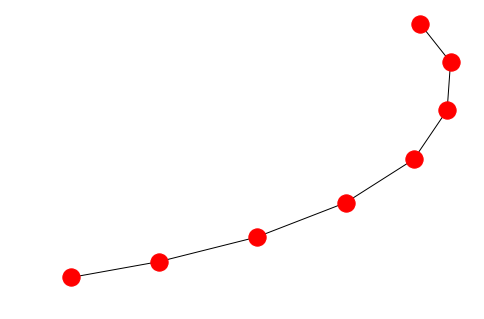

In [17]:
nx.draw(nx.Graph(connection_2))

## Sentences generation

In [19]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [31]:
import random

def parse_grammar(grammar_str,sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line:continue
            
        target,rules = line.split(sep)
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    return grammar

In [32]:
g = parse_grammar(grammar)
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [26]:
def generate(grammar_parsed,target='sentence'):
    if target not in grammar_parsed:
        return target
    rule = random.choice(grammar_parsed[target])
    return ''.join(generate(grammar_parsed,target=r) for r in rule if r != 'null')

In [46]:
generate(g)

'一个小小的好看的小小的小小的桌子看见一个篮球'